In [4]:
import pandas as pd
import zipfile
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Lectura de archivos 

In [2]:
data_path = r"D:\DANE - Contrato\2024\Operativo Barrido\Data\CENSO 2022"
#df_id = pd.read_excel(os.path.join(data_path,"Modulo_identificacion\Capítulo 1.xlsx"),header = 0, sep = ";")

### 1.1 Módulos de identificación, ubicación y personal
df_id: Módulo de identificación  
df_ib: Módulo identificación básica  
df_po: Módulo de personal ocupado


In [5]:
df_id = pd.read_excel(os.path.join(data_path,"Capítulo 1.xlsx"),header = 0)
df_ib = pd.read_excel(os.path.join(data_path,"Capítulo 2.xlsx"),header = 0)
df_po = pd.read_excel(os.path.join(data_path,"Capítulo 3.xlsx"),header = 0)

<AxesSubplot:>

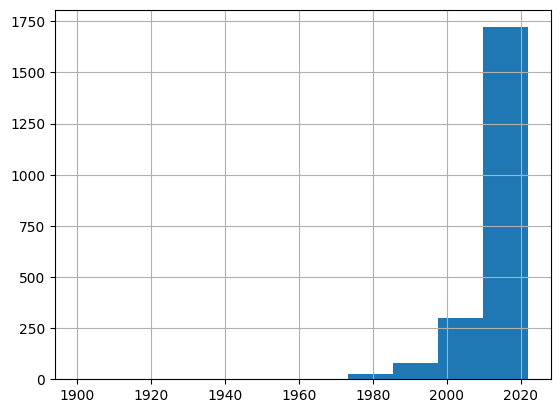

In [14]:
df_ib['IDAIO'].hist()

In [15]:
df_ib['IDAIO'].describe()

count    2129.000000
mean     2015.413340
std         9.825457
min      1900.000000
25%      2012.000000
50%      2019.000000
75%      2022.000000
max      2022.000000
Name: IDAIO, dtype: float64

### 1.2 Módulo Costos y Gastos

#### 1.2.1 Módulo Costos

In [56]:
df_cg_e = pd.read_excel(os.path.join(data_path,"Capítulo 4.xlsx"),header = 0) # COSTO_TOTAL es igual a la suma de los individuales
df_cg_c = pd.read_excel(os.path.join(data_path,"Capítulo 4a.xlsx"),header = 0) # No tiene datos
df_cg_t = pd.read_excel(os.path.join(data_path,"Capítulo 4t.xlsx"),header = 0)

In [97]:
df_cg_e.replace(to_replace=99, value=np.nan, inplace= True)
df_cg_e['COSTO_TOTAL'].fillna(0,inplace=True)
(df_cg_e[['COSTO_FINAN', 'COSTO_HONO', 'COSTO_MAQ', 'COSTO_MMTO','COSTO_MPE', 'COSTO_PUB', 'COSTO_SERV', 'COSTO_TRANS','COSTO_VTA']].sum(axis=1) == df_co_e['COSTO_TOTAL']).value_counts()
df_cg_e[['UID_ENCUESTA','COSTO_FINAN', 'COSTO_HONO', 'COSTO_MAQ', 'COSTO_MMTO','COSTO_MPE', 'COSTO_PUB', 'COSTO_SERV', 'COSTO_TRANS','COSTO_VTA','COSTO_TOTAL']][~(df_co_e[['COSTO_FINAN', 'COSTO_HONO', 'COSTO_MAQ', 'COSTO_MMTO','COSTO_MPE', 'COSTO_PUB', 'COSTO_SERV', 'COSTO_TRANS','COSTO_VTA']].sum(axis=1) == df_co_e['COSTO_TOTAL'])].sort_values(['COSTO_TOTAL'])
#df_cg_e[['COSTO_TOTAL']][~(df_co_e[['COSTO_FINAN', 'COSTO_HONO', 'COSTO_MAQ', 'COSTO_MMTO','COSTO_MPE', 'COSTO_PUB', 'COSTO_SERV', 'COSTO_TRANS','COSTO_VTA']].sum(axis=1) == df_co_e['COSTO_TOTAL'])].value_counts()

,UID_ENCUESTA,COSTO_FINAN,COSTO_HONO,COSTO_MAQ,COSTO_MMTO,COSTO_MPE,COSTO_PUB,COSTO_SERV,COSTO_TRANS,COSTO_VTA,COSTO_TOTAL
2279,10464784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0


In [12]:
df_cg_c.isna().sum()

ID_COSTOS4A21        0
FECHA_CREACION    3514
GALQME            3514
GCONT             3514
GMATE             3514
GMATECONT         3514
GOTROSC           3514
GPERMLIC          3514
GSEGUIR           3514
GSEGUR            3514
GTOTALC           3514
ID                3514
ID_ENCUESTA       3514
IMEI              3514
OBS4              3514
UID_ENCUESTA         0
USUARIO           3514
dtype: int64

In [74]:
df_cg_t.replace(to_replace=99, value=np.nan, inplace= True)
df_cg_t['COSTO_TOTAL'] = df_cg_t[['CLICEN', 'CLLANTAS', 'CLOG', 'COSTO_HONOT','COSTO_PUBT', 'CPEAJE', 'CREVTEC', 'CSEGUR']].sum(axis=1)

In [75]:
df_cg_t[['UID_ENCUESTA','CLICEN', 'CLLANTAS', 'CLOG', 'COSTO_HONOT','COSTO_PUBT', 'CPEAJE', 'CREVTEC', 'CSEGUR','COSTO_TOTAL']][df_cg_t['COSTO_TOTAL']!=0]

,UID_ENCUESTA,CLICEN,CLLANTAS,CLOG,COSTO_HONOT,COSTO_PUBT,CPEAJE,CREVTEC,CSEGUR,COSTO_TOTAL
262,8533224,NaN,NaN,NaN,15600000.0,NaN,NaN,NaN,NaN,1.560000e+07
263,8533255,NaN,NaN,NaN,15600000.0,NaN,NaN,NaN,NaN,1.560000e+07
309,70,NaN,5.000000e+04,0.0,NaN,NaN,NaN,NaN,NaN,5.000000e+04
415,68,NaN,2.000000e+06,2000000.0,NaN,NaN,NaN,NaN,NaN,4.000000e+06
727,989138,2000000.0,9.000000e+07,9000000.0,NaN,NaN,2000000.0,3000000.0,2000000.0,1.080000e+08
728,1015347,2000000.0,1.000000e+05,28800.0,NaN,NaN,200000.0,200000.0,200000.0,2.728800e+06
830,49,400000.0,2.000000e+07,100000.0,NaN,NaN,100000.0,900000.0,300000.0,2.180000e+07
831,50,NaN,2.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+10
1352,90,500000.0,0.000000e+00,500000.0,NaN,NaN,500000.0,250000.0,500000.0,2.250000e+06
1356,1009601,10000000.0,9.000000e+07,90000000.0,NaN,NaN,1000000.0,1000000.0,90000000.0,2.820000e+08


#### 1.2.2 Módulo Gastos

In [29]:
#df_cg_e.columns
(df_cg_e[['GACUED_ANO','GARRIEN_ANO','GCOMB_ANO','GCOMUN_ANO','GENERGIA_ANO','GMANT_ANO','GOTROS_ANO']].sum(axis=1) == df_cg_e['GTOTAL_ANO']).value_counts()

False    2456
True     1058
dtype: int64

In [32]:
df_cg_e[['GACUED_ANO','GARRIEN_ANO','GCOMB_ANO','GCOMUN_ANO','GENERGIA_ANO','GMANT_ANO','GOTROS_ANO','GTOTAL_ANO']][~(df_cg_e[['GACUED_ANO','GARRIEN_ANO','GCOMB_ANO','GCOMUN_ANO','GENERGIA_ANO','GMANT_ANO','GOTROS_ANO']].sum(axis=1) == df_cg_e['GTOTAL_ANO'])].isna().sum()

GACUED_ANO      2456
GARRIEN_ANO     2456
GCOMB_ANO       2456
GCOMUN_ANO      2456
GENERGIA_ANO    2456
GMANT_ANO       2456
GOTROS_ANO      2456
GTOTAL_ANO      2456
dtype: int64

In [99]:
(df_cg_e[['GACUED_ANOV','GARRIEN_ANOV','GCOMB_ANOV','GCOMUN_ANOV','GENERGIA_ANOV','GMANT_ANOV','GOTROS_ANOV']].sum(axis=1) == df_cg_e['GTOTAL_ANOV']).value_counts()

False    3210
True      304
dtype: int64

In [101]:
df_cg_e[['GACUED_ANOV','GARRIEN_ANOV','GCOMB_ANOV','GCOMUN_ANOV','GENERGIA_ANOV','GMANT_ANOV','GOTROS_ANOV','GTOTAL_ANOV']][~(df_cg_e[['GACUED_ANOV','GARRIEN_ANOV','GCOMB_ANOV','GCOMUN_ANOV','GENERGIA_ANOV','GMANT_ANOV','GOTROS_ANOV']].sum(axis=1) == df_cg_e['GTOTAL_ANOV'])].isna().sum()

GACUED_ANOV      3210
GARRIEN_ANOV     3210
GCOMB_ANOV       3210
GCOMUN_ANOV      3210
GENERGIA_ANOV    3210
GMANT_ANOV       3210
GOTROS_ANOV      3210
GTOTAL_ANOV      3210
dtype: int64

In [55]:
(df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT']].sum(axis=1) == df_cg_t['GTOTALT_ANOT']).value_counts()
#(df_cg_t[['GACUEDT','GALQEQTR','GALQOTR','GCOMBU','GENERGIAT','GFINAN','GFLETES','GLUBRIC','GMANTT','GOTRCOST','GRODAM','GTELECOM']].sum(axis = 1) == df_cg_t['GTOTALT']).value_counts()

False    3508
True        6
dtype: int64

In [103]:
df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT','GTOTALT']][~(df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT']].sum(axis = 1) == df_cg_t['GTOTALT_ANOT'])].isna().sum()
#df_cg_t[['GACUEDT','GALQEQTR','GALQOTR','GCOMBU','GENERGIAT','GFINAN','GFLETES','GLUBRIC','GMANTT','GOTRCOST','GRODAM','GTELECOM','GTOTALT']][~(df_cg_t[['GACUEDT','GALQEQTR','GALQOTR','GCOMBU','GENERGIAT','GFINAN','GFLETES','GLUBRIC','GMANTT','GOTRCOST','GRODAM','GTELECOM']].sum(axis = 1) == df_cg_t['GTOTALT'])].isna().sum()

GACUED_ANOT      3508
GALQEQTR_ANOT    3508
GALQOTR_ANOT     3508
GCOMB_ANOT       3508
GENERGIA_ANOT    3508
GFINAN_ANOT      3508
GFLETES_ANOT     3508
GLUBRIC_ANOT     3508
GMANT_ANOT       3508
GOTRCOST_ANOT    3508
GRODAM_ANOT      3508
GTELECOM_ANOT    3508
GTOTALT          3498
dtype: int64

In [40]:
df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT','GTOTALT']][~(df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT']].sum(axis = 1) == df_co_t['GTOTALT'])].isna().sum()

GACUED_ANOT      3508
GALQEQTR_ANOT    3508
GALQOTR_ANOT     3508
GCOMB_ANOT       3508
GENERGIA_ANOT    3508
GFINAN_ANOT      3508
GFLETES_ANOT     3508
GLUBRIC_ANOT     3508
GMANT_ANOT       3508
GOTRCOST_ANOT    3508
GRODAM_ANOT      3508
GTELECOM_ANOT    3508
GTOTALT          3498
dtype: int64

In [57]:
df_cg_t[['GACUED_ANOT','GALQEQTR_ANOT','GALQOTR_ANOT','GCOMB_ANOT','GENERGIA_ANOT','GFINAN_ANOT','GFLETES_ANOT','GLUBRIC_ANOT','GMANT_ANOT','GOTRCOST_ANOT','GRODAM_ANOT','GTELECOM_ANOT','GTOTALT']][~(df_cg_t['GTOTALT'].isna())]

,GACUED_ANOT,GALQEQTR_ANOT,GALQOTR_ANOT,GCOMB_ANOT,GENERGIA_ANOT,GFINAN_ANOT,GFLETES_ANOT,GLUBRIC_ANOT,GMANT_ANOT,GOTRCOST_ANOT,GRODAM_ANOT,GTELECOM_ANOT,GTOTALT
262,0.0,0.0,0.0,0.0,5400000.0,60000000.0,0.0,0.0,0.0,0.0,0.0,14400000.0,1.560000e+07
263,0.0,0.0,0.0,0.0,5400000.0,60000000.0,0.0,0.0,0.0,0.0,0.0,14400000.0,1.560000e+07
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+04
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+06
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080000e+08
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.128800e+06
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+07
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+10
1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000e+06
1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.822000e+08


### 1.3 Módulo Ingresos

In [58]:
df_ing_e = pd.read_excel(os.path.join(data_path,"Capítulo 5.xlsx"),header = 0) 
df_ing_c = pd.read_excel(os.path.join(data_path,"Capítulo 5a.xlsx"),header = 0)
df_ing_t = pd.read_excel(os.path.join(data_path,"Capítulo 5t.xlsx"),header = 0)

In [65]:
df_ing_e.replace(to_replace=99, value=np.nan, inplace= True)
(df_ing_e[['ING_COM','ING_FINAN', 'ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_OTROPER','ING_OTROS','ING_SERV']].sum(axis=1) == df_ing_e['ING_TOTAL']).value_counts()

False    2134
True     1380
dtype: int64

In [69]:
df_ing_e[['ING_COM','ING_FINAN', 'ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_OTROPER','ING_OTROS', 'ING_TOTAL', 'ING_SERV']][~(df_ing_e[['ING_COM','ING_FINAN', 'ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_OTROPER','ING_OTROS', 'ING_SERV']].sum(axis=1) == df_ing_e['ING_TOTAL'])].isna().sum()

ING_COM        2133
ING_FINAN      2134
ING_IND        2133
ING_MAQUIL     2133
ING_MMTO       2133
ING_OTROPER    2133
ING_OTROS      2134
ING_TOTAL      2133
ING_SERV       2133
dtype: int64

In [72]:
df_ing_e[['UID_ENCUESTA','ING_COM','ING_FINAN', 'ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_OTROPER','ING_OTROS', 'ING_TOTAL', 'ING_SERV']][~(df_ing_e[['ING_COM','ING_FINAN', 'ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_OTROPER','ING_OTROS', 'ING_SERV']].sum(axis=1) == df_ing_e['ING_TOTAL']) & (~df_ing_e['ING_IND'].isna())]

,UID_ENCUESTA,ING_COM,ING_FINAN,ING_IND,ING_MAQUIL,ING_MMTO,ING_OTROPER,ING_OTROS,ING_TOTAL,ING_SERV
24,9035014,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.000000e+10,2.0


In [93]:
df_ing_c.replace(to_replace=99, value=np.nan, inplace= True)
(df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV']].sum(axis=1) == df_ing_c['ING_TOTALC']).value_counts()

False    3507
True        7
dtype: int64

In [90]:
df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV','ING_TOTALC']][(df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV']].sum(axis=1) == df_ing_c['ING_TOTALC'])]

,ING_ALQ,ING_CE,ING_CONCE,ING_CP,ING_EXT,ING_GE,ING_OTROS,ING_SUB,ING_SERV,ING_TOTALC
1371,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
1414,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,90000000.0
1549,0.0,13021666.0,0.0,117358636.0,0.0,0.0,0.0,0.0,0.0,130380302.0
1903,0.0,0.0,0.0,482637000.0,0.0,0.0,0.0,49354000.0,0.0,531991000.0
2561,0.0,0.0,0.0,600000000.0,0.0,0.0,0.0,0.0,0.0,600000000.0
2562,0.0,0.0,0.0,600000000.0,0.0,0.0,0.0,0.0,0.0,600000000.0
2856,0.0,0.0,0.0,600000000.0,0.0,0.0,0.0,0.0,0.0,600000000.0


In [94]:
df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV','ING_TOTALC']][~(df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV']].sum(axis=1) == df_ing_c['ING_TOTALC'])].isna().sum()

ING_ALQ       3499
ING_CE        3499
ING_CONCE     3499
ING_CP        3499
ING_EXT       3499
ING_GE        3499
ING_OTROS     3499
ING_SUB       3499
ING_SERV      3504
ING_TOTALC    3507
dtype: int64

In [95]:
df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV','ING_TOTALC']][~(df_ing_c[['ING_ALQ', 'ING_CE', 'ING_CONCE', 'ING_CP', 'ING_EXT', 'ING_GE','ING_OTROS', 'ING_SUB','ING_SERV']].sum(axis=1) == df_ing_c['ING_TOTALC']) & (~df_ing_c['ING_ALQ'].isna())]

,ING_ALQ,ING_CE,ING_CONCE,ING_CP,ING_EXT,ING_GE,ING_OTROS,ING_SUB,ING_SERV,ING_TOTALC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
668,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,NaN,NaN
747,3000000.0,30000.0,3000000.0,30000.0,3000000.0,30000.0,3000000.0,30000.0,NaN,NaN
753,3000000.0,3000000.0,2500000.0,900000000.0,1000000.0,1000000.0,200000.0,5000000.0,300000.0,NaN
1217,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.0,NaN
1218,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.0,NaN
1504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [104]:
df_ing_t.replace(to_replace=99, value=np.nan, inplace= True)


In [106]:
(df_ing_t[['IMESETOT', 'INGALQEQTR', 'INGCARGA', 'INGLOGIST', 'INGMIXTO','INGOTRINM', 'INGPASAJ', 'INGRODAM']].sum(axis=1) == df_ing_t['ING_TOTALT']).value_counts()

False    3514
dtype: int64

In [108]:
df_ing_t.isna().sum()

ID_INGRESOS5T22       0
FECHA_CREACION     3498
ID                 3498
ID_ENCUESTA        3498
IMEI               3498
IMESETOT           3499
INGALQEQTR         3499
INGCARGA           3501
INGLOGIST          3499
INGMIXTO           3499
INGOTRINM          3499
INGPASAJ           3499
INGRODAM           3500
ING_TOTALT         3514
OBS5T              3507
OTING              3500
UID_ENCUESTA          0
USUARIO            3498
dtype: int64

In [110]:
df_ing_t[['IMESETOT', 'INGALQEQTR', 'INGCARGA', 'INGLOGIST', 'INGMIXTO','INGOTRINM', 'INGPASAJ', 'INGRODAM','ING_TOTALT']][~df_ing_t['INGLOGIST'].isna()]

,IMESETOT,INGALQEQTR,INGCARGA,INGLOGIST,INGMIXTO,INGOTRINM,INGPASAJ,INGRODAM,ING_TOTALT
286,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.080000e+08,0.0,NaN
287,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.080000e+08,0.0,NaN
340,0.0,0.0,NaN,0.0,0.0,0.0,0.000000e+00,0.0,NaN
500,2000000.0,2000000.0,2.000000e+06,200000.0,300000.0,2000000.0,2.000000e+06,2800000.0,NaN
931,0.0,0.0,0.000000e+00,0.0,0.0,0.0,9.000000e+07,0.0,NaN
932,100000.0,188088.0,1.000000e+05,10880.0,10000.0,10088.0,1.008000e+05,10000.0,NaN
1131,0.0,0.0,0.000000e+00,0.0,0.0,0.0,9.000000e+00,0.0,NaN
1132,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.909000e+07,NaN,NaN
2022,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.500000e+07,250000.0,NaN
2026,0.0,0.0,5.000000e+05,0.0,1000000.0,0.0,9.000000e+07,0.0,NaN
